# Python 第4次作业

使用“数据6.1”数据文件（详情已在第6章中介绍），以收入档次
（V1）为响应变量，以工作年限（V2）、绩效考核得分（V3）和违规操作积
分（V4）为特征变量，构建判别分析算法模型。

## 1. 载入分析所需要的模块和函数

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

---

## 2. 数据读取及观察

In [113]:
data = pd.read_csv('../data/数据6.1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1034 non-null   int64  
 1   V2      1034 non-null   int64  
 2   V3      1034 non-null   float64
 3   V4      1034 non-null   float64
 4   V5      1034 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 40.5 KB


In [114]:
len(data.columns)

5

一共有5列数据

In [115]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5'], dtype='object')

In [116]:
data.shape

(1034, 5)

In [117]:
data.dtypes

V1      int64
V2      int64
V3    float64
V4    float64
V5      int64
dtype: object

In [118]:
data.isnull().values.any()

np.False_

In [119]:
data.isnull().sum()

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64

In [120]:
data.head()

,V1,V2,V3,V4,V5
0,3,2,110.9,107.0,2
1,3,5,73.8,73.5,2
2,3,2,111.3,101.9,2
3,3,4,247.7,202.0,2
4,3,8,227.5,167.0,2


In [121]:
data.V1.value_counts()

V1
2    417
3    407
1    210
Name: count, dtype: int64

---

## 3. 特征变量相关性分析

In [122]:
X = data.drop(['V1', 'V5'], axis=1)  # 设置特征变量，即除V1之外的全部变量
y = data['V1']  # 设置响应变量，即V1
X.corr()

,V2,V3,V4
V2,1.000000,0.265740,0.089397
V3,0.265740,1.000000,0.820136
V4,0.089397,0.820136,1.000000


<Axes: >

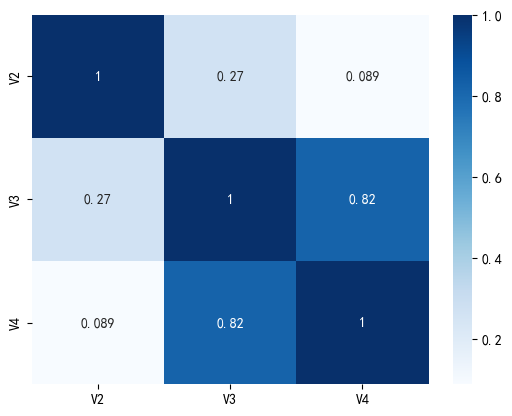

In [123]:
sns.heatmap(X.corr(), cmap='Blues', annot=True)

---

## 4. 使用样本示例全集开展线性判别分析

### 4.1 模型估计及性能分析

In [124]:
# 使用LDA算法
model = LinearDiscriminantAnalysis()
model.fit(X, y)
model.score(X, y)

0.941972920696325

In [125]:
model.priors_

array([0.20309478, 0.4032882 , 0.39361702])

In [126]:
model.means_

array([[ 26.77619048, 201.27952381, 148.29857143],
       [ 17.75539568, 151.67577938, 129.18153477],
       [  6.36855037, 151.31498771, 134.27665848]])

In [127]:
np.set_printoptions(suppress=True)
# 输出模型系数
model.coef_

array([[ 0.82747483,  0.03041262, -0.02576049],
       [ 0.19186874, -0.00554052,  0.00173484],
       [-0.62353557, -0.01001536,  0.01151419]])

In [128]:
# 输出模型截距项
model.intercept_

array([-20.79039778,  -3.42192464,   5.77888113])

In [129]:
# 输出可解释方差比例
model.explained_variance_ratio_

array([0.98306151, 0.01693849])

In [130]:
model.scalings_

array([[-0.26211658, -0.05094088],
       [-0.00620112,  0.02973706],
       [ 0.00605892, -0.01776271]])

In [131]:
lda_scores = model.fit(X, y).transform(X)
lda_scores.shape

(1034, 2)

In [132]:
lda_scores[:5, :]

array([[ 3.57952136, -0.34171335],
       [ 2.82025903, -1.00273009],
       [ 3.5461404 , -0.23922872],
       [ 2.78257341,  1.936977  ],
       [ 1.64730727,  1.75421967]])

In [133]:
LDA_scores = pd.DataFrame(lda_scores, columns=['LD1', 'LD2'])
LDA_scores['收入档次'] = data['V1']
LDA_scores.head()

,LD1,LD2,收入档次
0,3.579521,-0.341713,3
1,2.820259,-1.002730,3
2,3.546140,-0.239229,3
3,2.782573,1.936977,3
4,1.647307,1.754220,3


In [134]:
d = {1: '高收入', 2: '中收入', 3: '低收入'}
LDA_scores['收入档次'] = LDA_scores['收入档次'].map(d) 
LDA_scores.head()

,LD1,LD2,收入档次
0,3.579521,-0.341713,低收入
1,2.820259,-1.002730,低收入
2,3.546140,-0.239229,低收入
3,2.782573,1.936977,低收入
4,1.647307,1.754220,低收入


<Axes: xlabel='LD1', ylabel='LD2'>

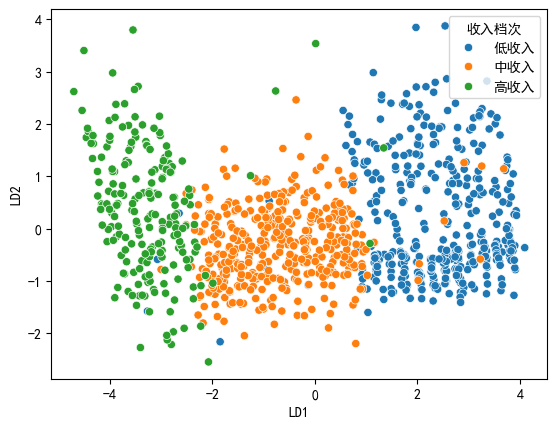

In [135]:
# 解决图表中负号不显示问题
plt.rcParams['axes.unicode_minus'] = False
# 解决图表中中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.scatterplot(x='LD1', y='LD2', data=LDA_scores, hue='收入档次')

### 4.2 运用两个特征变量绘制LDA决策边界图

In [136]:
!pip --default-timeout=123 install mlxtend

In [137]:
from mlxtend.plotting import plot_decision_regions#导入plot_decision_regions

In [138]:
X2 = X.iloc[:, 0:2]  # 仅选取V2存款规模、V3EVA作为特征变量
model = LinearDiscriminantAnalysis()  # 使用LDA算法
model.fit(X2, y)
model.score(X2, y)

0.9410058027079303

In [139]:
model.explained_variance_ratio_

array([0.98603802, 0.01396198])

/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'LDA决策边界')

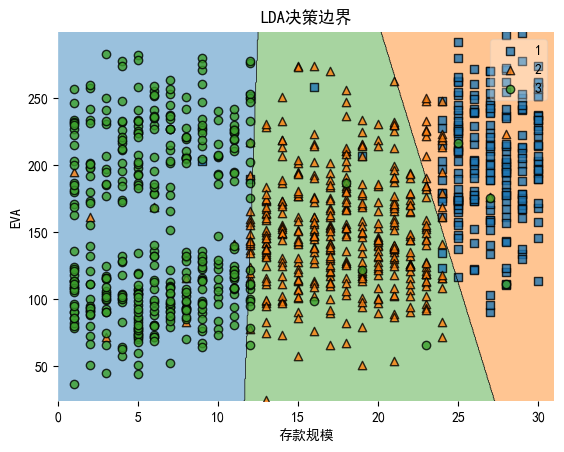

In [140]:
plot_decision_regions(np.array(X2), np.array(y), model)
plt.xlabel('存款规模')#将x轴设置为'存款规模'
plt.ylabel('EVA')#将y轴设置为'EVA'
plt.title('LDA决策边界')#将标题设置为'LDA决策边界'

---

## 5. 使用分割样本开展线性判别分析

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=123)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9742765273311897

In [142]:
prob = model.predict_proba(X_test)
prob[:5]

array([[0.02195931, 0.92653898, 0.05150171],
       [0.03569766, 0.9598369 , 0.00446544],
       [0.00115299, 0.57214367, 0.42670334],
       [0.        , 0.00039815, 0.99960185],
       [0.98726864, 0.01273121, 0.00000015]])

In [143]:
pred = model.predict(X_test)
pred[:5]

array([2, 2, 2, 3, 1])

In [144]:
confusion_matrix(y_test, pred)#输出测试样本的混淆矩阵

array([[ 60,   2,   1],
       [  0, 121,   5],
       [  0,   0, 122]])

In [145]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        63
           2       0.98      0.96      0.97       126
           3       0.95      1.00      0.98       122

    accuracy                           0.97       311
   macro avg       0.98      0.97      0.97       311
weighted avg       0.98      0.97      0.97       311



In [146]:
cohen_kappa_score(y_test, pred)

0.9597586814822003